# Taller MAT266 - Análisis de Regresión
## Clase 1, Modelos de regresión lineal multiple y sus interpretaciones

,Temperatura,Distancia.alejada.del.reactor
,<dbl>,<dbl>
1,9.154422,0.1840366
2,11.442383,0.1457067
3,8.297371,0.1397953
4,4.937557,0.4360686
5,-42.893634,2.8949685
6,2.192240,1.2295621


  Temperatura       Distancia.alejada.del.reactor
 Min.   :-162.734   Min.   :0.03727              
 1st Qu.:   2.953   1st Qu.:0.34590              
 Median :   6.381   Median :0.80877              
 Mean   :  -1.156   Mean   :1.03215              
 3rd Qu.:   8.248   3rd Qu.:1.29248              
 Max.   :  15.878   Max.   :4.83281              

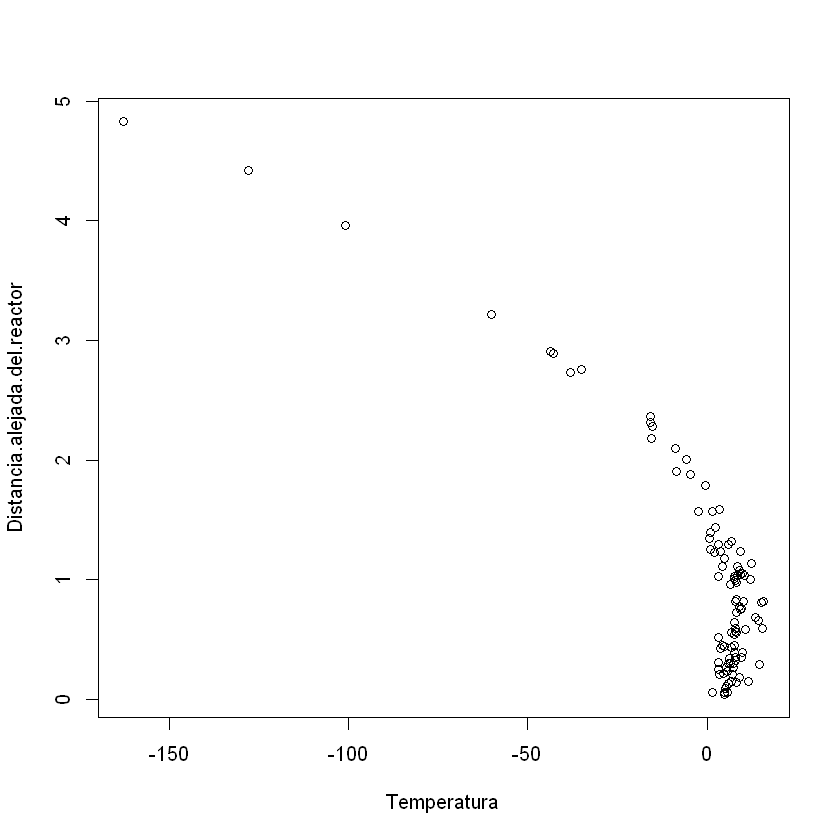

In [253]:
data = read.csv('https://raw.githubusercontent.com/Fabimath/mat266_taller/main/data_base/temperaturas.csv')
head(data)
summary(data)
plot(data)

Ajustar una función no se ve razonable en esta estructura, re-definamos las variables

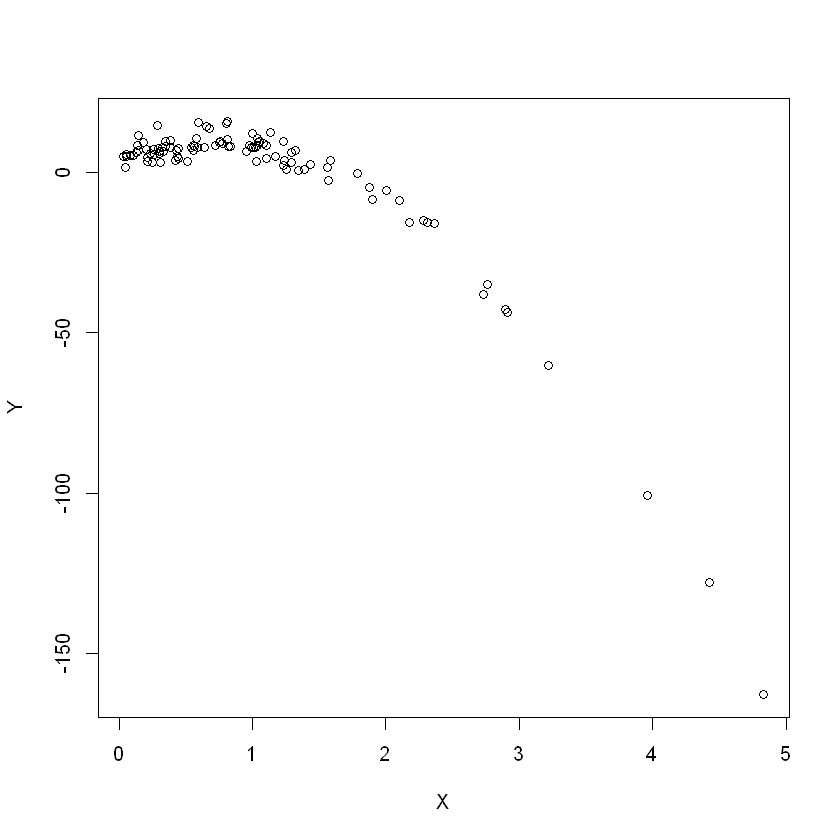

In [254]:
X=data$Distancia.alejada.del.reactor
Y=data$Temperatura
plot(X,Y)

Para esta estructura 'parece un poco mas razonable', intentemos ver algunos estadísticos y probemos hacer una regresión

In [255]:
cor(X,Y)

[1] -0.847452


Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-71.319  -9.021   3.536  10.670  18.645 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   23.355      2.097   11.14   <2e-16 ***
X            -23.748      1.503  -15.80   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.11 on 98 degrees of freedom
Multiple R-squared:  0.7182,	Adjusted R-squared:  0.7153 
F-statistic: 249.7 on 1 and 98 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  resid(reg)
W = 0.86983, p-value = 6.903e-08


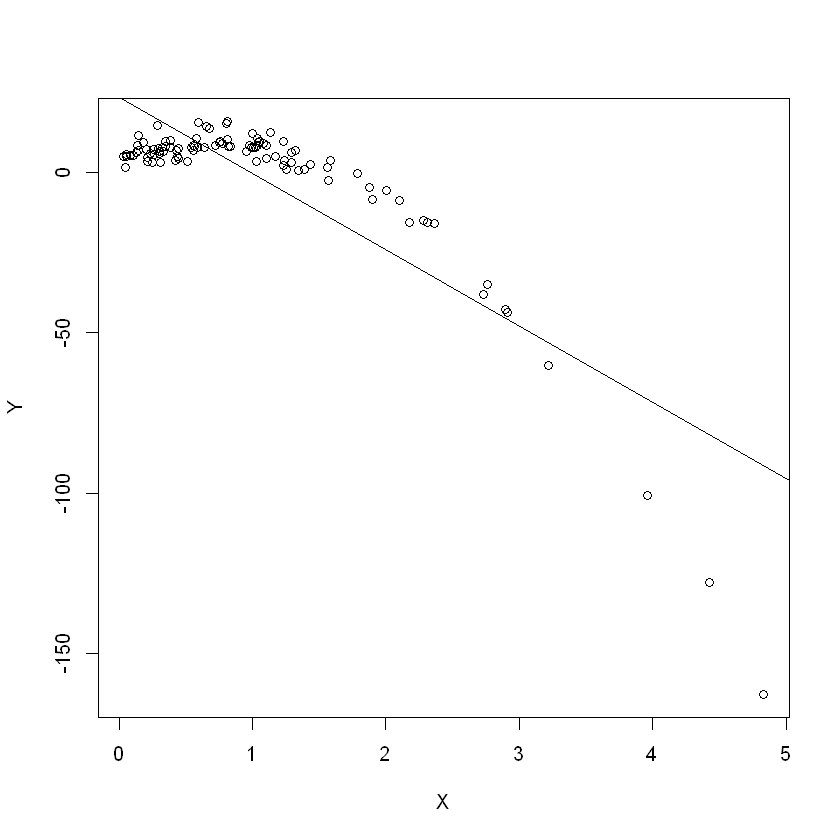

In [256]:
reg = lm(Y~X)
summary(reg)
plot(X,Y)
abline(reg)
shapiro.test(resid(reg))

Se ven pesimos resultados con este modelo. Probaremos una regresión multiple del estilo
$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2
$$

In [257]:
#Definimos X^2
X2 = X^2
#Modelamos
reg2=lm(Y~X+X2)
summary(reg2)
shapiro.test(resid(reg2))


Call:
lm(formula = Y ~ X + X2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3684 -1.8831 -0.1282  1.7041  7.1271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.3203     0.5829   7.411 4.68e-11 ***
X            13.6054     0.8392  16.213  < 2e-16 ***
X2          -10.0238     0.2098 -47.778  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.864 on 97 degrees of freedom
Multiple R-squared:  0.9885,	Adjusted R-squared:  0.9883 
F-statistic:  4174 on 2 and 97 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  resid(reg2)
W = 0.97579, p-value = 0.06219


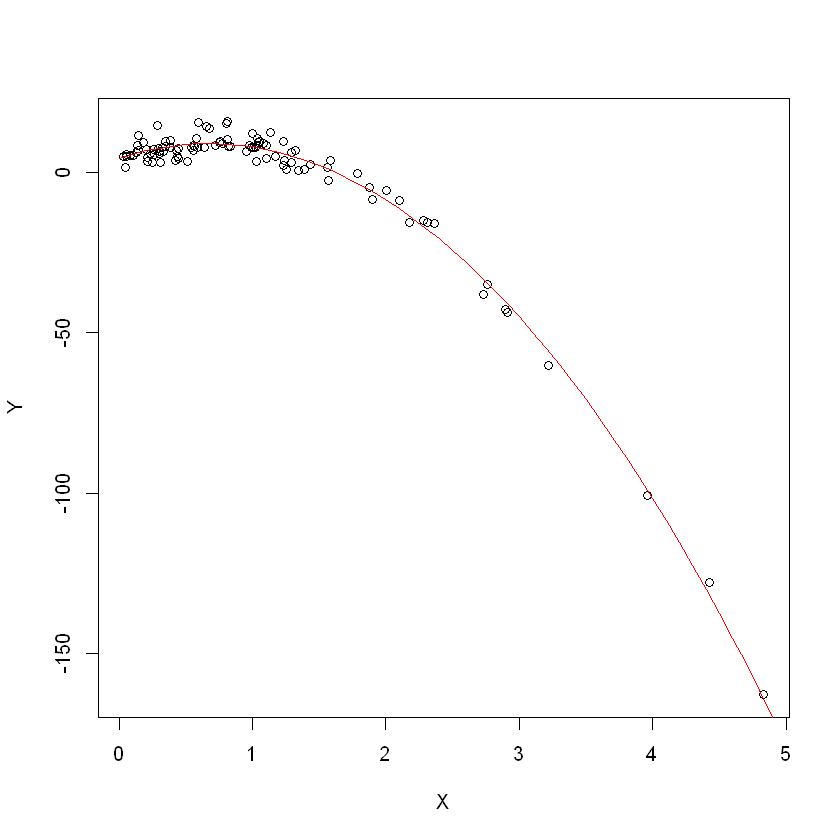

In [258]:
plot(X,Y)
# Debemos definir la curva de la función
f = function(x){
    y=c()
    for (i in x){
        aux=as.double(coef(reg2)%*%c(1,i,i^2))
        y=c(y,aux)
    }
    return(y)
}
# Creamos una secuencia de predicciones
x.pred = seq(0,5,0.1)
#x.pred = X
y.pred = f(x.pred)
points(x = x.pred, y = y.pred, col='red', type = 'l') # l,s,p

Se ve razonable el modelo! vamos bien encaminados!
¿Pero qué tal un modelo cúbico?
$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \beta_3 x_i^3
$$

In [259]:
#Definimos X^3
X3 = X^3
#Modelamos
reg3=lm(Y~X+X2+X3)
summary(reg3)
shapiro.test(resid(reg3))


Call:
lm(formula = Y ~ X + X2 + X3)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5399 -1.5308 -0.2452  1.6150  7.3074 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.4514     0.7466   4.623 1.18e-05 ***
X            16.5448     1.8083   9.149 1.00e-14 ***
X2          -11.9615     1.0794 -11.081  < 2e-16 ***
X3            0.3036     0.1660   1.829   0.0705 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.83 on 96 degrees of freedom
Multiple R-squared:  0.9889,	Adjusted R-squared:  0.9886 
F-statistic:  2851 on 3 and 96 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  resid(reg3)
W = 0.97898, p-value = 0.1107


Mejora el modelo, por simplicidad trabajemos con el bivariado.
## Estudio de predicciones

In [260]:
summary(reg2)


Call:
lm(formula = Y ~ X + X2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3684 -1.8831 -0.1282  1.7041  7.1271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.3203     0.5829   7.411 4.68e-11 ***
X            13.6054     0.8392  16.213  < 2e-16 ***
X2          -10.0238     0.2098 -47.778  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.864 on 97 degrees of freedom
Multiple R-squared:  0.9885,	Adjusted R-squared:  0.9883 
F-statistic:  4174 on 2 and 97 DF,  p-value: < 2.2e-16


Comentarios, los parámetros pasan la prueba de no nulidad, el $R^2$ y el $R^2$ ajustado son muy razonalbes, y la prueba de no nulidad conjunta de los parámetros es significativamente no nula. Estamos en un buen escenario.

Anteriormente se mostro como hacer una predicción con programación únicamente usando ciclo `for` pero ahora usaremos funciones del R, entonces:

In [273]:
# En primer lugar estudiaremos una predicción, por ejemplo para cuando X=3
f(3)
dfn = data.frame(X=3,X2=9)
predict(reg2, dfn)
# y podemos obtener el intervalo de confianza para las predicciones
predict(reg2, dfn, interval = 'confidence', level = 0.90)

[1] -45.07742

1 
-45.07742

,fit,lwr,upr
1,-45.07742,-46.18603,-43.96881


In [262]:
# Creamos un vector de predicciones
pred = predict(reg2, interval = "confidence")
pred

,fit,lwr,upr
1,6.484686,5.559355,7.410018
2,6.089884,5.120433,7.059336
3,6.026374,5.049914,7.002834
4,8.347102,7.646665,9.047539
5,-40.300130,-41.580408,-39.019851
6,5.894809,5.136405,6.653214
7,8.743394,8.097248,9.389539
8,8.162810,7.512519,8.813101
9,6.104175,5.136305,7.072046
10,3.854381,3.026177,4.682586


In [263]:
# Ordenamos los para las predicciones
df = data.frame(X,pred)
df_ordenado = df[order(df$X), ]
df_ordenado

,X,fit,lwr,upr
,<dbl>,<dbl>,<dbl>,<dbl>
31,0.03726853,4.813427,3.707224,5.919630
75,0.05205545,5.001369,3.914798,6.087940
83,0.05926121,5.091366,4.014253,6.168479
25,0.05943916,5.093576,4.016695,6.170456
60,0.08967408,5.459742,4.421746,6.497738
24,0.10607262,5.650675,4.633220,6.668129
98,0.13257141,5.947813,4.962715,6.932910
3,0.13979526,6.026374,5.049914,7.002834
2,0.14570673,6.089884,5.120433,7.059336


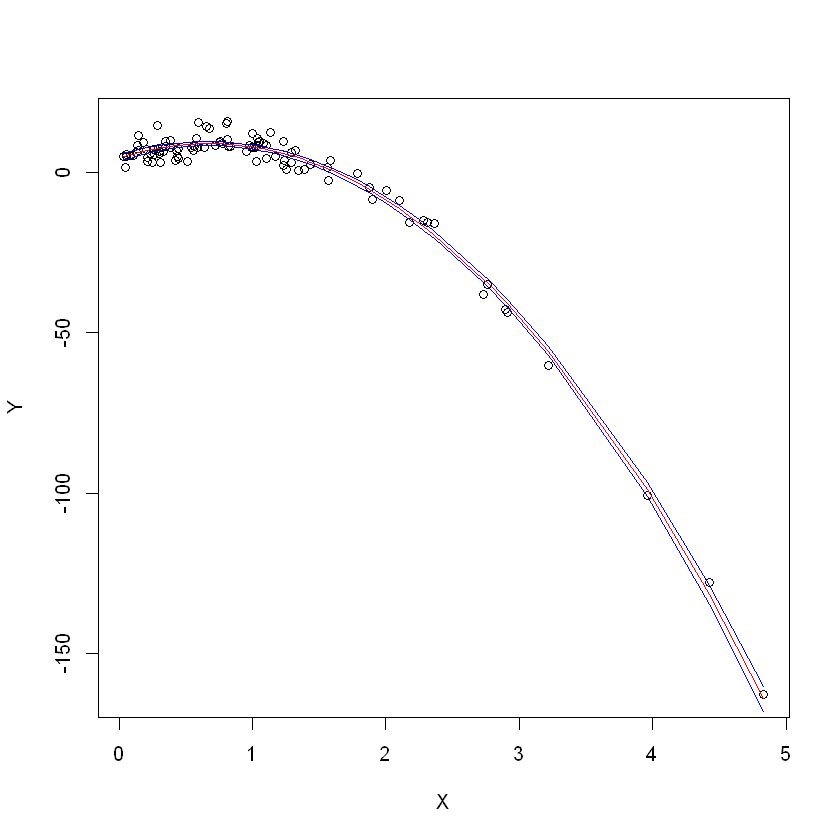

In [264]:
plot(X,Y)
points(x = df_ordenado$X, y = df_ordenado$fit, col='red', type = 'l') # l,s,p
points(x = df_ordenado$X, y = df_ordenado$lwr, col='blue', type = 'l') # l,s,p
points(x = df_ordenado$X, y = df_ordenado$upr, col='blue', type = 'l') # l,s,p

## Propiedades de los estimadores
Ahora sacaremos algunas conclusiones sobre los estimadores en particular sus intervalos de confianza.

In [265]:
reg2


Call:
lm(formula = Y ~ X + X2)

Coefficients:
(Intercept)            X           X2  
       4.32        13.61       -10.02  


In [266]:
confint(reg2,level = 0.95)

,2.5 %,97.5 %
(Intercept),3.163308,5.477285
X,11.939833,15.270943
X2,-10.440158,-9.607372


# Trabajo en ggplot2
ggplot2 es una librería preferente para hacer gráficos estadísticos. Realizaremos el mismo trabajo anterior en ggplot2.

In [267]:
# Resumen
head(df_ordenado)

,X,fit,lwr,upr
,<dbl>,<dbl>,<dbl>,<dbl>
31,0.03726853,4.813427,3.707224,5.919630
75,0.05205545,5.001369,3.914798,6.087940
83,0.05926121,5.091366,4.014253,6.168479
25,0.05943916,5.093576,4.016695,6.170456
60,0.08967408,5.459742,4.421746,6.497738
24,0.10607262,5.650675,4.633220,6.668129


In [268]:
#install.packages('ggplot2')
library('ggplot2')
eje.x= data.frame(seq(0,5,0.01))
eje.x2= data.frame(seq(0,5,0.01)^2)
dataX=cbind(eje.x,eje.x2)
names(dataX) = c('X','X2')
head(dataX)

,X,X2
,<dbl>,<dbl>
1,0.00,0.0000
2,0.01,0.0001
3,0.02,0.0004
4,0.03,0.0009
5,0.04,0.0016
6,0.05,0.0025


In [269]:
pred_df = predict(reg2, newdata = dataX, interval = "confidence")
head(pred)

,fit,lwr,upr
1,6.484686,5.559355,7.410018
2,6.089884,5.120433,7.059336
3,6.026374,5.049914,7.002834
4,8.347102,7.646665,9.047539
5,-40.300130,-41.580408,-39.019851
6,5.894809,5.136405,6.653214


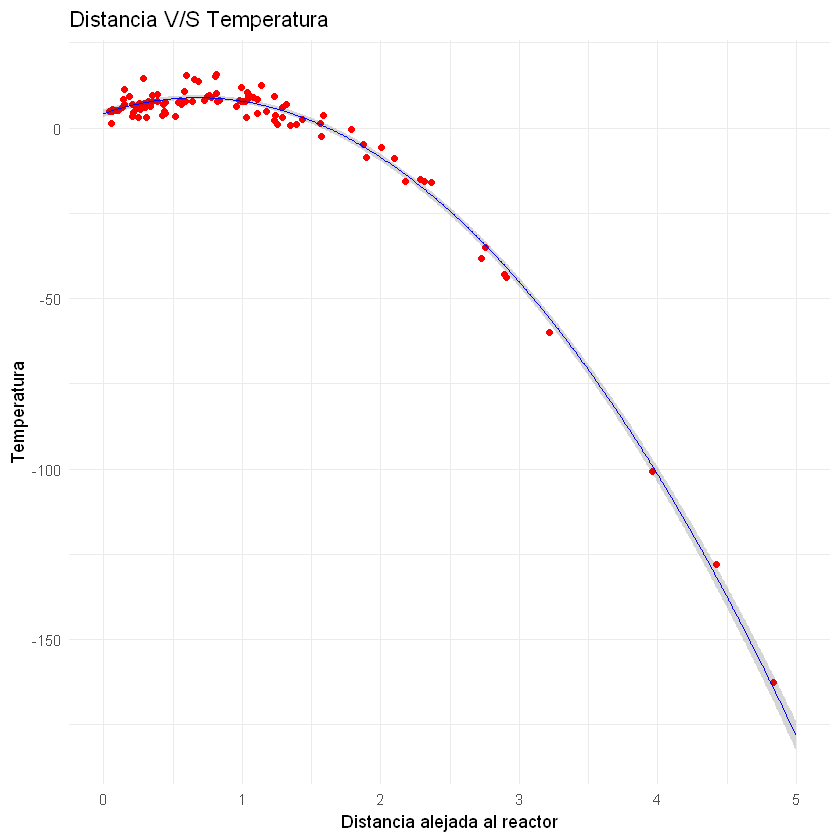

In [270]:
ggplot(pred_df, aes(x = dataX$X)) +
  geom_point(data = data.frame(X,Y) , aes(x = X, y = Y), color = "red") +
  geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = 0.2) +
  geom_line(aes(y = fit), color = "blue") +
  xlab('Distancia alejada al reactor') +
  ylab('Temperatura') +
  ggtitle('Distancia V/S Temperatura')+
  theme_minimal()

Warning message:
"Removed 14 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 300 rows containing missing values or values outside the scale range (`geom_line()`)."


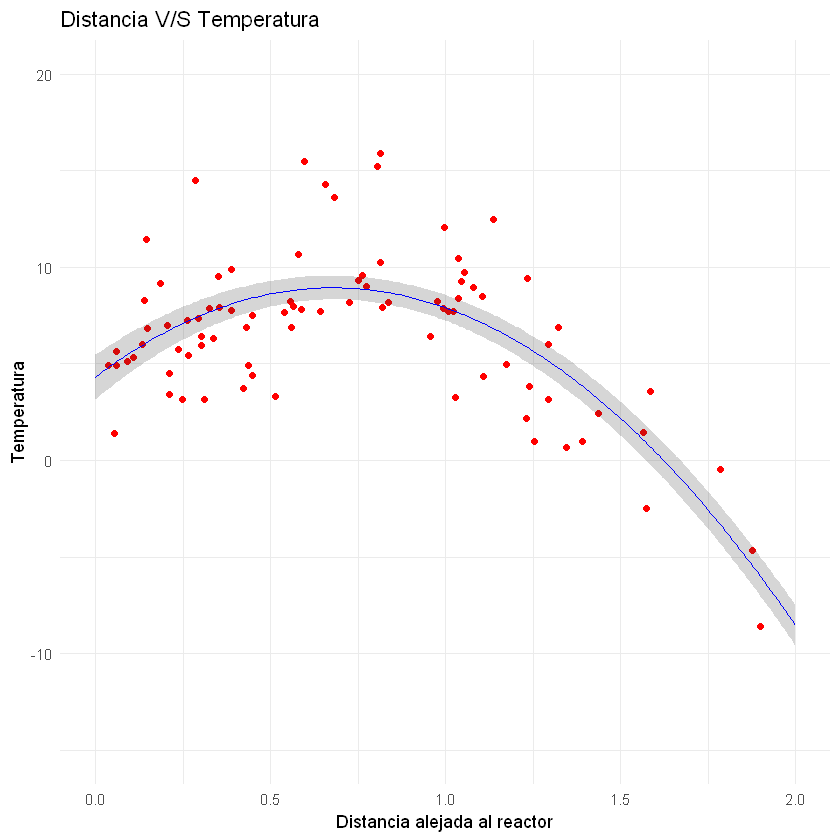

In [271]:
ggplot(pred_df, aes(x = dataX$X)) +
  geom_point(data = data.frame(X,Y) , aes(x = X, y = Y), color = "red") +
  geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = 0.2) +
  geom_line(aes(y = fit), color = "blue") +
  xlab('Distancia alejada al reactor') +
  ylab('Temperatura') +
  ggtitle('Distancia V/S Temperatura')+
  xlim(c(0, 2)) +
  ylim(c(-15,20)) +
  theme_minimal()